**Creating a MNIST Classifier with Accuracy >= 97%**
--

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
print(type(mnist.data))
print(type(mnist.target))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.12, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(61600, 784)
(61600,)
(8400, 784)
(8400,)


## Applying the Machine Learning Approach

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

# Initialisation
rfc = RandomForestClassifier(n_jobs=-1)
knc = KNeighborsClassifier(n_jobs=-1)

In [5]:
# Training the Classifiers
for clf in [rfc, knc]:
    scores = cross_val_score(clf, X_train, y_train, scoring="f1_weighted", cv=5, n_jobs=-1)
    print(clf, scores)

RandomForestClassifier(n_jobs=-1) [0.96946521 0.96863793 0.9684008  0.9685697  0.96659372]
KNeighborsClassifier(n_jobs=-1) [0.9706105  0.97087086 0.96999612 0.97098513 0.97201425]


In [14]:
print("Tunable Parameters\n", rfc.estimator_params)
print("\nParameters after Training\n", rfc.get_params())

Tunable Parameters
 ('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha', 'monotonic_cst')

Parameters after Training
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.base import clone

# Tuning the Random Forest Classifier
param_grid = {
    "bootstrap": [False, True],
    "max_depth": [10, 100, 500, 1000],
    "n_estimators": [10, 100, 500, 1000],
    "n_jobs": [-1]
}

# Declaring the GridSearch Object
grid_rfc = GridSearchCV(
    estimator=clone(rfc), param_grid=param_grid, scoring="f1_weighted", n_jobs=-1, cv=5, refit=True
)

# Training the GridSearch Object
grid_rfc.fit(X_train, y_train)

print("Best Estimator\n", grid_rfc.best_estimator_)
print("\nBest Parameters\n", grid_rfc.best_params_)

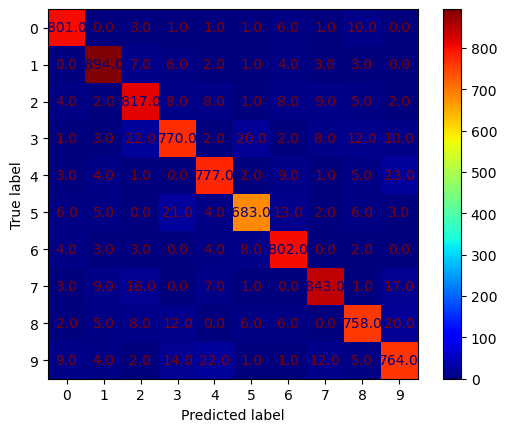

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

predictions = cross_val_predict(
    estimator=rfc, X=X_test, y=y_test, cv=5, n_jobs=-1
)

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions, values_format=".1f", cmap="jet")

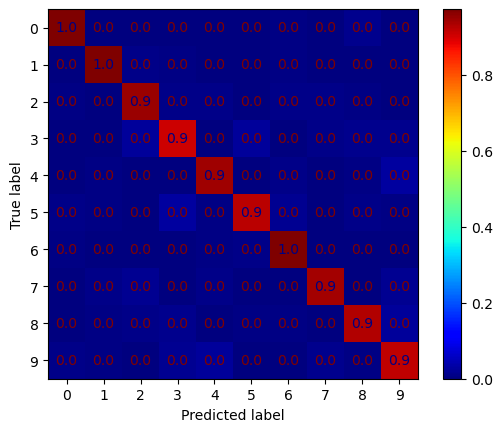

In [12]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions, values_format=".1f", cmap="jet", normalize="true")

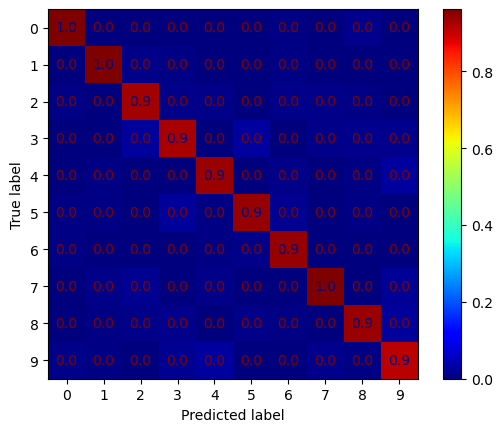

In [13]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions, values_format=".1f", cmap="jet", normalize="pred")

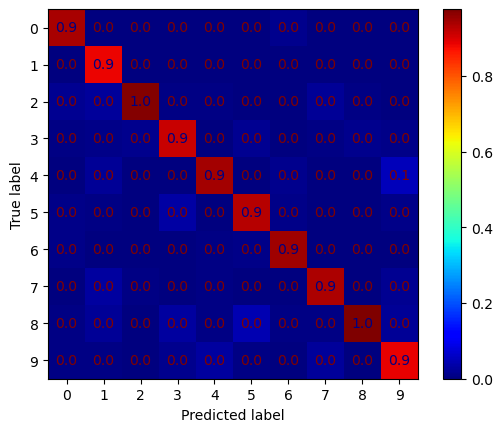

In [15]:
predictions = cross_val_predict(knc, X_test, y_test, cv=3, n_jobs=-1)
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap="jet", normalize="pred", values_format=".1f")

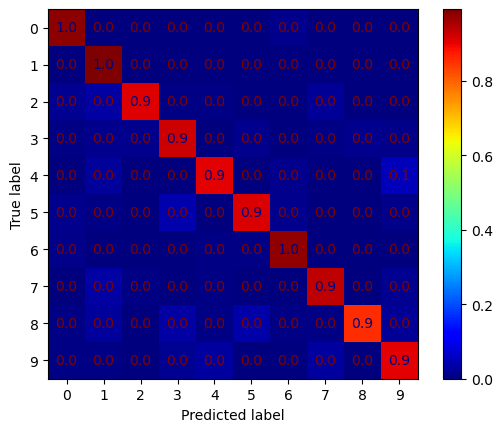

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap="jet", normalize="true", values_format=".1f")